## Работа с несбалансированными классами

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('diabetes.csv', skiprows=1, names=col_names)

In [3]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [7]:
df['label'].value_counts()

0    500
1    268
Name: label, dtype: int64

In [8]:
X = df.drop('label', axis=1)
y = df['label']

In [9]:
X.shape, y.shape

((768, 8), (768,))

In [10]:
len(df) - len(df.drop_duplicates())

0

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [12]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(solver='liblinear')
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

Оценим эффективность

In [13]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7662337662337663
0.5909090909090909


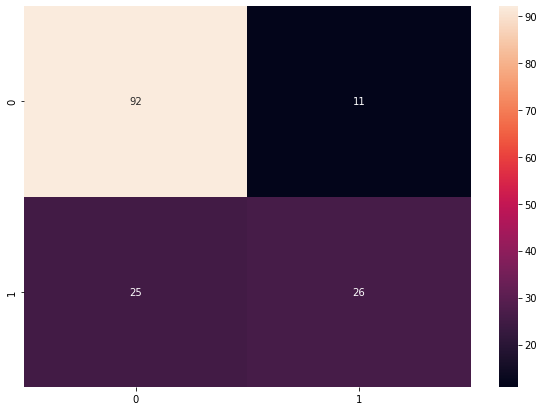

In [14]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

### Способ борьбы с дисбалансом классов

In [15]:
class0_index = np.where(y==0)[0]
class1_index = np.where(y==1)[0]

### 1) Лучший способ - собрать больше наблюдений миноритарного класса. Но это не всегда возможно

### 2) Понизить мажоритарный класс

In [16]:
class0_index_downsampled = np.random.choice(class0_index, len(class1_index), replace=False)

In [17]:
len(class0_index_downsampled)

268

In [18]:
y_new = pd.concat([y.iloc[class0_index_downsampled], y.loc[class1_index]], axis=0)

In [19]:
y_new.shape

(536,)

In [20]:
y_new.value_counts()

0    268
1    268
Name: label, dtype: int64

In [21]:
X_new = pd.concat([X.iloc[class0_index_downsampled], X.loc[class1_index]], axis=0)
X_new.shape

(536, 8)

Обучим модель на сбалансированных данных

0.6944444444444444
0.6972477064220183


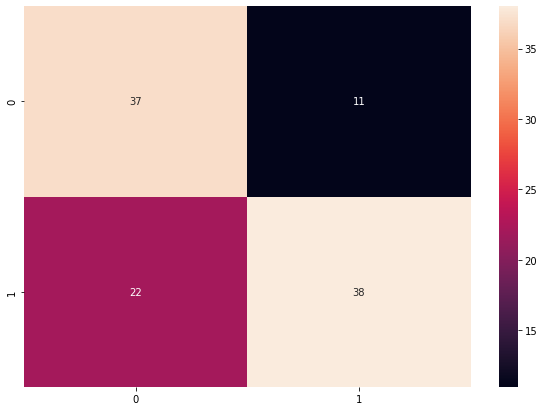

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=25)
cls = LogisticRegression(solver='liblinear')
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

## 3) Повысить миноритарный класс

In [23]:
class1_index_upsampled = np.random.choice(class1_index, len(class0_index), replace=True)

In [24]:
len(class1_index_upsampled)

500

In [25]:
y_new = pd.concat([y.iloc[class1_index_upsampled], y.loc[class0_index]], axis=0)
y_new.shape

(1000,)

In [26]:
y_new.value_counts()

1    500
0    500
Name: label, dtype: int64

In [27]:
X_new = pd.concat([X.iloc[class1_index_upsampled], X.loc[class0_index]], axis=0)
X_new.shape

(1000, 8)

0.785
0.7772020725388602


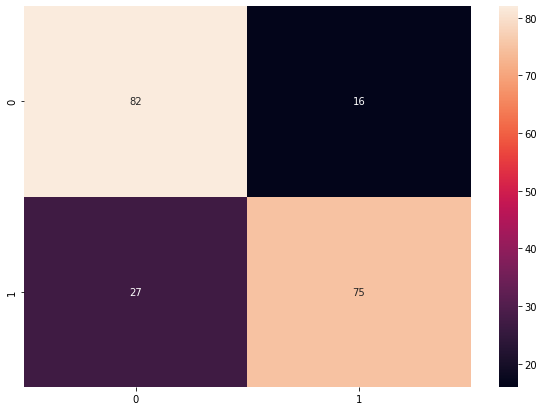

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=25)
cls = LogisticRegression(solver='liblinear')
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);